![CC-BY-SA](https://mirrors.creativecommons.org/presskit/buttons/88x31/svg/by-sa.svg)


This notebook was created by [Bernardo Freitas Paulo da Costa](http://www.im.ufrj.br/bernardofpc),
and is licensed under Creative Commons BY-SA.

Antes de enviar este Teste, verifique que tudo está funcionando como esperado.
Por exemplo, **rode o código inteiro, do zero**.
Para isso, vá no menu, escolha _Kernel_, depois _Restart & Run All_.

Verifique, também, que você respondeu todas as questões:
* as questões de código têm `YOUR CODE HERE` (e você pode apagar o `raise NotImplemented` ao incluir sua resposta)
* as questões discursivas têm "YOUR ANSWER HERE".

---

In [42]:
import numpy as np
import matplotlib.pyplot as plt

# Integrais difíceis

Vimos em aula que os métodos de "alta ordem" convergem mais rápido quando a função é várias vezes diferenciável.
Neste teste, vamos olhar a situação contrária:
vamos integrar funções que não são
- diferenciáveis
- contínuas

no intervalo de integração, e ver como os métodos se comportam!

In [43]:
# Métodos do retângulo, ponto médio e simpson.
# Nomes: retangulo, midpoint, simpson
# Forma: (f,a,b,n=100)

# YOUR CODE HERE
def retangulo(f, a, b, n=100):
    pontos, h = np.linspace(a, b, n, endpoint=False, retstep=True)
    area = np.sum(f(pontos))*h
    
    return area


def midpoint(f, a, b, n=100):
    pontos, h = np.linspace(a, b, n, endpoint=False, retstep=True)
    pontos += h/2
    area = np.sum(f(pontos))*h
    
    return area


def simpson(f, a, b, n=100):
    pontosEsquerda, h = np.linspace(a, b, n, endpoint=False, retstep=True)
    pontosMeio =     pontosEsquerda + h/2
    pontosDireita =  pontosEsquerda + h

    area = np.sum(f(pontosEsquerda) + 4*f(pontosMeio) + f(pontosDireita)) * (h/6)

    return area


methods = [retangulo, midpoint, simpson]

# Parte 1: Integrando uma função que não é diferenciável

In [44]:
def df(f,x,h=2**-17):
    """17*3 = 54"""
    return (f(x+h) - f(x-h))/(2*h)

In [45]:
f = np.abs

## Questão 1: Dê uma primitiva de $f$.

In [46]:
def F(x):
    return (x * np.abs(x)) / 2

In [47]:
assert np.abs(df(F,1) - 1) < 1e-12

In [48]:
assert np.abs(df(F,-2) - 2) < 2e-12

In [49]:
np.random.seed(1)
xs = np.random.randn(10)
relerr = (df(F,xs) - f(xs))/f(xs)
assert np.all(np.abs(relerr) < 2e-11)

$F$ é diferenciável em zero, mas é uma conta difícil

In [50]:
df(F,0)

3.814697265625e-06

## Questão 2: Convergência das integrais

A que velocidade decai o erro de integração de $f$ no intervalo $[0,1]$?

1. Faça um gráfico com alguns valores de $n$, para observar a ordem dos três métodos
    - Dica: `f.__name__` dá o nome de uma função, para você usar na legenda
2. Depois, dê a ordem do método do retângulo

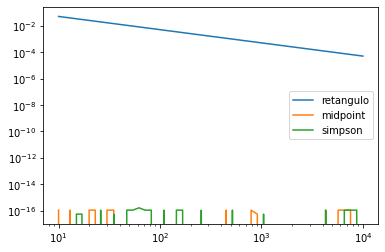

In [51]:
ans = F(1) - F(0)
ns = np.logspace(1, 4,dtype=int)
for m in methods:
    valores = np.array([m(f, 0, 1, n) for n in ns])
    erro = abs(valores - ans)
    plt.loglog(ns, erro, label=m.__name__)

plt.legend()
plt.show()

In [52]:
decay_speed = 1 # Grau do polinômio .

In [53]:
for n in np.random.randint(100,10000, size=(6)):
    I1 = retangulo(f,0,1,n)
    err1 = np.abs(I1 - ans)
    I2 = retangulo(f,0,1,2*n)
    err2 = np.abs(I2 - ans)
    assert np.abs( err2/err1 - 2**-decay_speed ) < 2*n*1e-14

Explique porque o teste está dando a ordem de convergência (Bônus)

A ordem de convergência vem de como o erro decresce, dado um aumento no número de pontos. Em $I_1$ tem $N$ pontos, em $I_2$ tem $2N$ pontos. e a divisão do 
$ \frac{ERR2}{ERR1} = \frac{1}{2^p}$ 
Onde o 2 é porque o número de pontos dobrou, e p seria a ordem de convergência. Que conseguimos ver no gráfico que o erro decresce linearmente logo a sua ordem de convergência é = 1.

Agora, explique o que aconteceu nos métodos do ponto médio e de Simpson.

A função que estamos aproximando é uma reta do intervalo $[0, 1]$. O que faz com que o método do retângulo apresente erros. Entretanto quando fizemos tanto o ponto médio quanto o simpson, esses erros são anulados. Isto porque o erro do método do ponto médio geralmente tenta aproximar a função tanto por cima quanto por baixo, mas como é uma reta os erros de cima se anulam com os de baixo. Fazendo com que apresente erros ínfimos.

## Questão 3: Mudando o intervalo de integração

Agora, faça o gráfico do erro para o intervalo $[-1,2]$.

In [54]:
# Faça aqui uma função genérica para "fazer gráficos de erro"
# f é a função, [a,b] o intervalo de integração, ans a "resposta correta"
def graph_err(f,a,b,ans):
    ns = np.logspace(1,4,dtype=int)
    for m in methods:
        valores = np.array([m(f, a, b, n) for n in ns])
        erro = abs(valores - ans)
        plt.loglog(ns, erro, label=m.__name__)
    plt.legend()

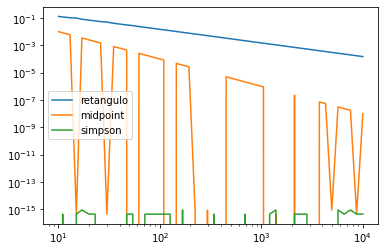

In [55]:
a,b = -1,2
ans = F(b) - F(a)
graph_err(f,a,b,ans)
plt.show()

Quais são as velocidades de convergência dos métodos?

Você percebe algum comportamento especial?  Como explicar isso?

O método do retângulo e o do midpoint(quando não 0) aparecem com a ordem de convergência 1.
Agora o método do midpoint apresenta problemas, quando o 0(ponto problématico) não esta nos extremos do intervalo há erros. Ou seja o midpoint consegue uma ótima aproximação quando o N consegue dividir o intervalo de tal maneira que ou o 0 fique nas extremidades ou próximo delas. E também existem casos onde o 0 acaba sendo o ponto médio do intervalo, gerando também um grandíssimo erro.

Agora, repita o estudo para o intervalo $[-1,1]$.

Aqui, será melhor ter um gráfico separado para cada um dos três métodos.

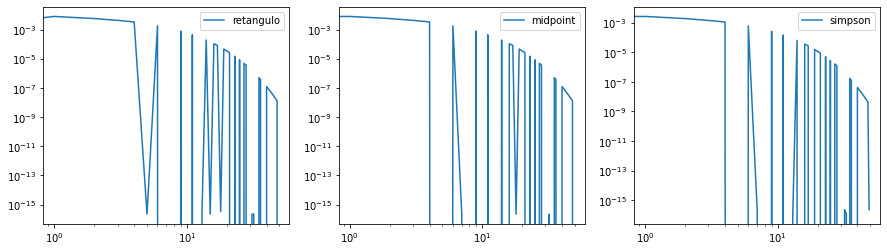

In [56]:
ans = F(1) - F(-1)
a = -1
b = 1
ns = np.logspace(1,4,dtype=int)
_, axs = plt.subplots(ncols=3, figsize=(15,4))

for m,ax in zip(methods,axs):
    valores = np.array([m(f, a, b, n) for n in ns])
    erro = abs(valores - ans)
    ax.loglog(erro, label=m.__name__)
    ax.legend()

plt.show()

O que aconteceu agora?
Porquê?

Agora todos os métodos possuem um certo tipo de 'cancelamento de erro'.
O método do rêtangulo possui porque a função é simétrica, e na parte negativa do intervalo ele apróxima a integral por cima, e na parte positiva ele aproxima a integral por baixo.
E nos pontos onde o erro vai a 0, são n que dividem o intervalo de forma 'correta', onde o 0 é deixado nas extremidades ou próximo dela.

## Questão 4: Intervalos "aleatórios"!

Como sugerido abaixo:
- Estude em três intervalos aleatórios;
- Para cada um deles, dê a evolução dos erros dos métodos conforme $n$ aumenta.

Aqui, usar a `graph_err` vai ser uma boa ideia ;-)

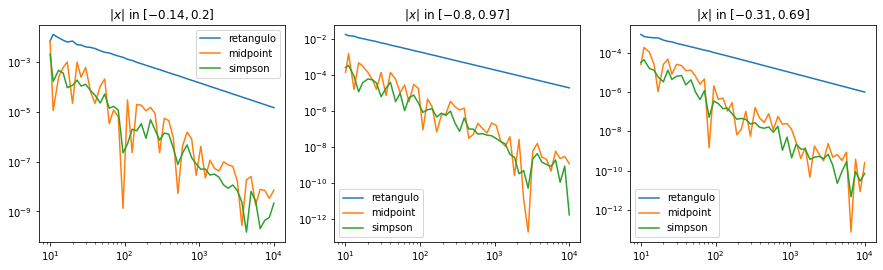

In [57]:
_, axs = plt.subplots(ncols=3, figsize=(15,4))
for ax in axs:
    # Três intervalos aleatórios!
    a,b = -np.random.rand(), np.random.rand()
    ans = F(b) - F(a)
    graph_err(f, a, b, ans)
    
    ax.set_title('$|x|$ in $[{:.2},{:.2}]$'.format(a,b))
    plt.sca(ax) # Porque a função "graph_err" age "no eixo corrente"

plt.show()

Como você interpreta o que aconteceu?

Aparecem ruídos no método midpoint e no simpson, isto porque os intervalos que contem 0, existe erro onde a área não consegue uma boa aproximação independente do método. 

# Parte 2: Uma função descontínua

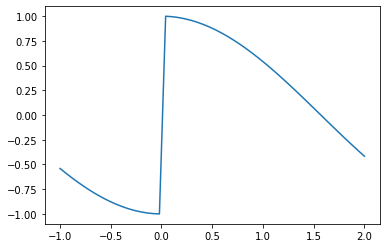

In [58]:
def g(x):
    return np.cos(x)*np.sign(x)

ts = np.linspace(-1,2)
plt.plot(ts, g(ts))
plt.show()

## Questão 5: Dê uma primitiva de $g$

In [59]:
def G(x):
    return np.sin(x)*np.sign(x)

In [60]:
assert np.abs(df(G,1) - g(1)) < 1e-12

In [61]:
np.random.seed(1)
xs = np.random.randn(10)
relerr = (df(G,xs) - g(xs))/g(xs)
assert np.all(np.abs(relerr) < 5e-11)

## Questão 6: Gráficos de erro!

- Para os intervalos [-1,1] e [-1,2]

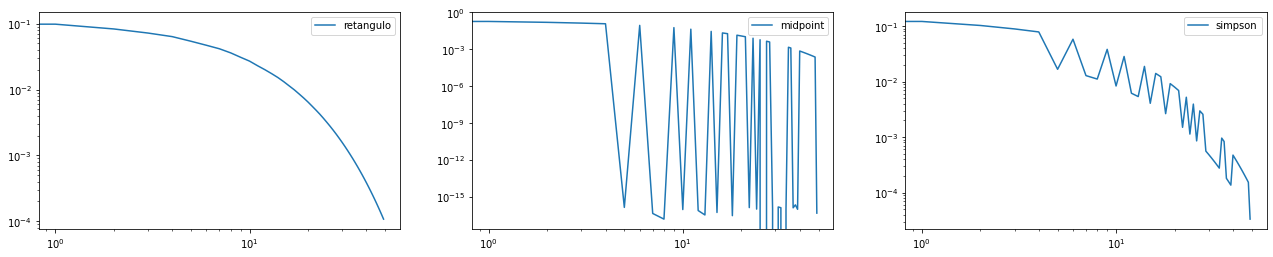

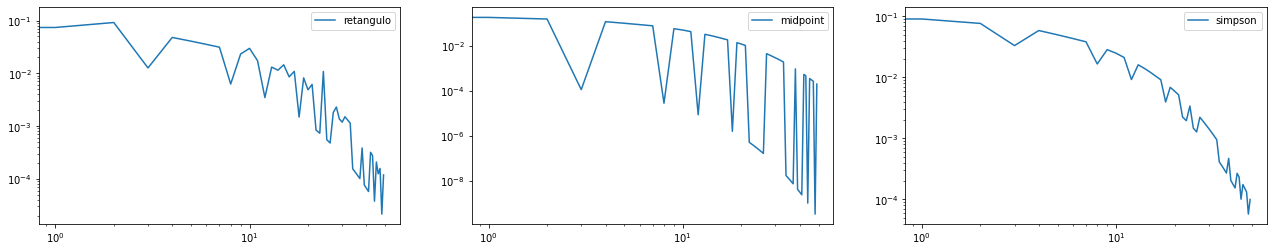

In [62]:
ns = np.logspace(1, 4, dtype=int)

_, axs = plt.subplots(ncols=3, figsize=(22,4))
a = -1
b = 1
ans = G(1) - G(-1)
for m,ax in zip(methods,axs):
    valores = np.array([m(g, a, b, n) for n in ns])
    erro = abs(valores - ans)
    ax.loglog(erro, label=m.__name__)
    ax.legend()

plt.show()

_, axs = plt.subplots(ncols=3, figsize=(22,4))
a = -1
b = 2
ans = G(2) - G(-1)
for m,ax in zip(methods,axs):
    valores = np.array([m(g, a, b, n) for n in ns])
    erro = abs(valores - ans)
    ax.loglog(erro, label=m.__name__)
    ax.legend()

plt.show()

E agora para três intervalos aleatórios

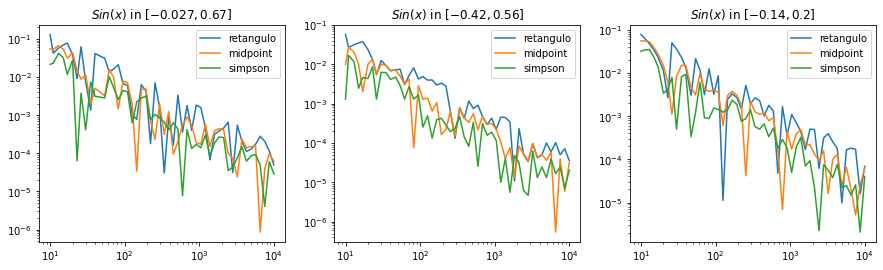

In [63]:
# Um intervalo aleatório!
_, axs = plt.subplots(ncols=3, figsize=(15,4))
for ax in axs:
    # Três intervalos aleatórios!
    a,b = -np.random.rand(), np.random.rand()
    ans = G(b) - G(a)
    graph_err(g, a, b, ans)
    
    ax.set_title('$Sin(x)$ in $[{:.2},{:.2}]$'.format(a,b))
    plt.sca(ax) # Porque a função "graph_err" age "no eixo corrente"
plt.show()

O que você pode concluir sobre o comportamento dos três métodos para funções descontínuas?

Quais fenômenos são similares para funções contínuas, mas não diferenciáveis?
Porquê?

In [64]:
# YOUR CODE HERE